# Winners of the Top 5 European Soccer Leagues (2014-2019) - Analysing the data behind each win

[GITHUB REPO: UCDPA_mauricecostelloe](https://github.com/mcostelloe/UCDPA_mauricecostelloe)

# Data Source

**Datasource:** [Kaggle](https://www.kaggle.com/slehkyi/web-scraping-football-statistics-2014-now/data)

**Dataset:** *Data from top 5 leagues in csv format which was pulled from the website **understat.com** using the web scraping methodology described in the link above* [Dataset](https://github.com/mcostelloe/UCDPA_mauricecostelloe/tree/main/Data)

# Abstract

This project analyses the relationships/trends that exist between a team's performance metrics and underlying statistics each season for Europe's top 5 leagues (Data range: 2014 - 2019). Luck, as we will refer to throughout this analysis measures the difference between a team's expected stats (expected points, goals & goals against) vs. their actual stats. First we must prove that these underlying statistics are reliable before then measuring them against actual datapoints. We will examine the most dominant teams in Europe year on year by looking at their points, goals & goals conceded per game. Did all of these winners deserve to win every time? We will experiment with their expected points and goals metrics to see if there has been any "Lucky" winners of each domestic league - Measuring the actual quality of their performances and stats along the way.

# Introduction

I chose this dataset because of the detailed range of metrics and information it contains for all the teams playing in Europe's top 5 leagues. The goal of my analysis is to dive deep into the statistics and underlying numbers behind the winners and losers of these leagues to try and better understand how performance metrics shape these competitions. Can we find any winners who won with some slight luck, and how are we going to back that up?


To allow for fair analysis between leagues, we must introduce metrics per game, (Pts/Goals per game) as not all the top 5 leagues play 38 games per season. We want to investigate the dataset to identify any common trends for the most dominant teams across these leagues. What part does "Luck" (Defined below) play, if any when a team win's their domestic league? Analyse the importance of scoring goals vs. conceding less in the run up to winning the league - Which is more important, a solid defence or exciting attack?

Over the five year period, the likes of Juventus and Bayern Munich remained unbeaten in their respective leagues. From a neutral's point of view this can be very boring - With no excitement of underdogs winning the league or competition at the top. We will use these two examples as case studies to examine the underlying stats behind their total points tallys, to see if these leagues really are uncompetitive and boring. Another interesting case is PSG, who won four out of five years here. We can check were they simply unlucky not to make it five from five. 

# Implementation Process

1. Define the Metrics being used in this dataset
2. Describe new Metrics created for this project
3. Create a list of questions before starting analysis - This will help steer direction to the analysis 
4. Clean the dataset to prepare for analysis 
5. Merge with match level dataset - (Useful for more granular analysis in the future like home vs. away form pre/post covid & empty stadiums)

## Definition of Metrics in Dataset:

**List of metrics taken from:** [Kaggle](https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg)

* **xG - "Expected Goals":** It is a statistical measure of the quality of chances created and conceded. Taken from [understat.com](understat.com)

* **xG_diff:** Difference between actual goals scored and expected goals.

* **npxG** - expected goals without penalties and own goals.

* **xGA** - expected goals against.

* **xGA_diff** - difference between actual goals missed and expected goals against.

* **xpts** - expected points

* **xpts_diff** - difference between actual and expected points

### Metrics I have created for the purpose of this analysis:

* **Total Points Luck Definition** - The Difference between league points and expected points each season
* **Goals Scored Luck Definition** - Difference between league goals and expected goals each season
* **Goals Against Luck Definition** - Difference between league goals conceded and expected goals conceded each season

**Questions**
* Are xG, xGA & xpts **reliable metrics**? Prove this 

* Who are the most dominant teams in Europe?

* What impact (If any) does luck play in the end league position for each team?

* Can we identify any years / competitions where the winner was **"Lucky"** to win the league (Based on the difference between their expected points and that of the 2nd place side)

* Do the "Top teams" tend to out-perform their underlying statistics (Do they score more than expected etc.)?

* Explore other relationships between metrics that can describe team performance over the course of a season 

## Import Functions

In [1]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

## Clean Data

In [2]:
"""
Adding API data pull to show capability

We will be using CSVs from the data source above throughout 
"""

# Data Source using API
api_data_pull = requests.get('https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg')

db = pd.DataFrame(api_data_pull)

In [3]:
# Read csv data using Pandas 
team_data = pd.read_csv('C:/Users/costelloem/UCDPA_mauricecostelloe/Data/stats_by_team.csv')
team_data.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [4]:
"""
Replace any missing column names
"""

# Re-Write dataset inserting column names for column 1 & 2
team_stats = team_data.rename(index=int, columns={'Unnamed: 0': 'league', 'Unnamed: 1': 'year', 'missed': 'GA'}) 
team_stats.head()

,league,year,position,team,matches,wins,draws,loses,scored,GA,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


### Merge with Match Level Dataset

* One of the course requirements - Merge dataset with the match level data for future work
* Project could include the analysis of home vs. away form pre/post covid (Will need to web scrape more data for 2020 & 2021)

In [5]:
# Read match level csv data using Pandas 
match_data = pd.read_csv('C:/Users/costelloem/UCDPA_mauricecostelloe/Data/stats_by_team_per_game.csv')
match_data.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713


In [6]:
"""
We want to join onto this table using the year, league and team columns 

This will give a more detailed view for each team by league and year 
"""

merged_df = team_stats.merge(match_data, on=['league', 'year', 'team'])

In [7]:
merged_df.head()

,league,year,position,team,matches,wins_x,draws_x,loses_x,scored_x,GA,...,npxGD_y,ppda_coef_y,ppda_att,ppda_def,oppda_coef_y,oppda_att,oppda_def,xG_diff_y,xGA_diff_y,xpts_diff_y
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,1.433200,6.545455,216,33,18.392857,515,28,-1.458760,0.108040,-0.3950
1,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,2.017090,3.750000,120,32,21.400000,321,15,2.125450,1.108360,-0.3126
2,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,2.079229,8.451613,262,31,11.352941,386,34,0.177200,0.097971,-0.1803
3,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,2.637640,7.000000,154,22,23.833333,429,18,-1.177100,0.441980,-0.0664
4,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,0.367707,4.571429,96,21,9.451613,293,31,0.646364,0.278657,0.6659


### Back to main dataset - Remove unwanted data

In [9]:
# Remove unwanted columns:
team_stats = team_stats[['league', 'year', 'position', 'matches', 'wins', 'team', 'scored', 'xG', 'xG_diff', 'GA', 'xGA', 'xGA_diff', 'pts', 'xpts', 'xpts_diff']]

In [10]:
# Examine all columns & data types
# team_stats.info()

#### Missing Values / Duplicates

In [27]:
"""
By looking at the info / shape of the dataset:

Comparing with the number of teams / league we don't expect any duplicate entries

To make sure we can drop any duplicates with function below
"""

# Remove any duplicate entries if there are any:
team_stats = team_stats.drop_duplicates()

In [11]:
"""
Check for any missing values throughout dataset to fix 
"""

# Show that the dataset has no NULL values:
team_stats.isnull().sum()

league       0
year         0
position     0
matches      0
wins         0
team         0
scored       0
xG           0
xG_diff      0
GA           0
xGA          0
xGA_diff     0
pts          0
xpts         0
xpts_diff    0
dtype: int64

In [12]:
"""
We are only interested in the Top 5 European leagues

These are: 
English Premier League, Italian Serie A, Spanish La Lig, German Bundesliga & French Ligue 1

Remove any unwanted data from "Other" leagues
"""
# What leagues are available in this dataset? We're only interested in the top 5
team_stats['league'].unique()

# Filter dataset for Europe's top 5 Leagues: PL, Serie A, Bundesliga, La Liga & Ligue 1:
team_stats = team_stats[team_stats.league != 'RFPL']

In [13]:
# List of Europe's top 5 leagues:
team_stats['league'].unique()

array(['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1'], dtype=object)

### Add new columns:

In [14]:
"""
To allow for fair analysis of "Luck" metric - We need to add a PPG column to the data as the 
number of games played across all 5 leagues are not consistent

Points per game, goals per game etc ...

No need to use "iterrows()" function here 
"""

# Some leagues might not have 38 games - We need to normalise their points using PPG (Pts per game):
team_stats['pts_per_game'] = team_stats['pts'] / team_stats['matches']

team_stats['xpts_per_game'] = team_stats['xpts'] / team_stats['matches']

# Do the same for goals & exp goals per game:
# team_stats['G_per_game'] = team_stats['scored'] / team_stats['matches']

# team_stats['xG_per_game'] = team_stats['xG'] / team_stats['matches']


# Do the same for goals against & exp goals against per game:
# team_stats['GA_per_game'] = team_stats['GA'] / team_stats['matches']

# team_stats['xGA_per_game'] = team_stats['xGA'] / team_stats['matches']

### Luck Metrics: 

#### Measure of how actual stats out/under performed the underlying statistics

* Build a function here to rank their level of "Luck" by the level at which they out/under perform the main performance metrics 
* A team that achieves > 10 points more than they were expected to will be classed as "Extremely Lucky"
* The opposite applies for under-performance across all metrics here

In [15]:
team_stats.head()

,league,year,position,matches,wins,team,scored,xG,xG_diff,GA,xGA,xGA_diff,pts,xpts,xpts_diff,pts_per_game,xpts_per_game
0,La_liga,2014,1,38,30,Barcelona,110,102.980152,-7.019848,21,28.444293,7.444293,94,94.0813,0.0813,2.473684,2.475824
1,La_liga,2014,2,38,30,Real Madrid,118,95.766243,-22.233757,38,42.607198,4.607198,92,81.7489,-10.2511,2.421053,2.151287
2,La_liga,2014,3,38,23,Atletico Madrid,67,57.047670,-9.952330,29,29.069107,0.069107,78,73.1353,-4.8647,2.052632,1.924613
3,La_liga,2014,4,38,22,Valencia,70,55.062500,-14.937500,32,39.392572,7.392572,77,63.7068,-13.2932,2.026316,1.676495
4,La_liga,2014,5,38,23,Sevilla,71,69.526624,-1.473376,45,47.862742,2.862742,76,67.3867,-8.6133,2.000000,1.773334


In [16]:
"""
Build a custom function which will look at each team and output whether or not they were Lucky / out-performed their
underlying statistics 

The opposite here, teams who have under-performed based on their underlying numbers
"""
# Define function here which will output Luck rank 
def luck_function(team_stats):
    
    if team_stats['xpts_diff'] < -10:
        return "Extremely Lucky"
    
    elif team_stats['xpts_diff'] < 0:
        return "Slightly Lucky"
    
    elif team_stats['xpts_diff'] > 0 and team_stats['xpts_diff'] < 10:
        return "Under-Performing"
    else:
        return "Massively Under-Performing"

In [17]:
team_stats['Measure_Pts_Luck'] = team_stats.apply(luck_function, axis=1)

team_stats.head()

,league,year,position,matches,wins,team,scored,xG,xG_diff,GA,xGA,xGA_diff,pts,xpts,xpts_diff,pts_per_game,xpts_per_game,Measure_Pts_Luck
0,La_liga,2014,1,38,30,Barcelona,110,102.980152,-7.019848,21,28.444293,7.444293,94,94.0813,0.0813,2.473684,2.475824,Under-Performing
1,La_liga,2014,2,38,30,Real Madrid,118,95.766243,-22.233757,38,42.607198,4.607198,92,81.7489,-10.2511,2.421053,2.151287,Extremely Lucky
2,La_liga,2014,3,38,23,Atletico Madrid,67,57.047670,-9.952330,29,29.069107,0.069107,78,73.1353,-4.8647,2.052632,1.924613,Slightly Lucky
3,La_liga,2014,4,38,22,Valencia,70,55.062500,-14.937500,32,39.392572,7.392572,77,63.7068,-13.2932,2.026316,1.676495,Extremely Lucky
4,La_liga,2014,5,38,23,Sevilla,71,69.526624,-1.473376,45,47.862742,2.862742,76,67.3867,-8.6133,2.000000,1.773334,Slightly Lucky


In [18]:
# Function for Goals "Luck"
def g_luck_function(team_stats):
    
    if team_stats['xG_diff'] < -10:
        return "Extremely Lucky"
    
    elif team_stats['xG_diff'] < 0:
        return "Slightly Lucky"
    
    elif team_stats['xG_diff'] > 0 and team_stats['xG_diff'] < 10:
        return "Under-Performing"
    else:
        return "Massively Under-Performing"
    
# One last function for GA: 
# Here, we would consider negative xGA_diff as "under-performing" as team conceded more than expected
def ga_luck_function(team_stats):
    
    if team_stats['xGA_diff'] < -10:
        return "Massively Under-Performing"
    
    elif team_stats['xGA_diff'] < 0:
        return "Under-Performing"
    
    elif team_stats['xGA_diff'] > 0 and team_stats['xGA_diff'] < 10:
        return "Slightly Lucky"
    else:
        return "Extremely Lucky"

In [19]:
# Create 2 more new columns:
team_stats['Measure_Goals_Luck'] = team_stats.apply(g_luck_function, axis=1)

team_stats['Measure_GA_Luck'] = team_stats.apply(ga_luck_function, axis=1)

team_stats.head()

,league,year,position,matches,wins,team,scored,xG,xG_diff,GA,xGA,xGA_diff,pts,xpts,xpts_diff,pts_per_game,xpts_per_game,Measure_Pts_Luck,Measure_Goals_Luck,Measure_GA_Luck
0,La_liga,2014,1,38,30,Barcelona,110,102.980152,-7.019848,21,28.444293,7.444293,94,94.0813,0.0813,2.473684,2.475824,Under-Performing,Slightly Lucky,Slightly Lucky
1,La_liga,2014,2,38,30,Real Madrid,118,95.766243,-22.233757,38,42.607198,4.607198,92,81.7489,-10.2511,2.421053,2.151287,Extremely Lucky,Extremely Lucky,Slightly Lucky
2,La_liga,2014,3,38,23,Atletico Madrid,67,57.047670,-9.952330,29,29.069107,0.069107,78,73.1353,-4.8647,2.052632,1.924613,Slightly Lucky,Slightly Lucky,Slightly Lucky
3,La_liga,2014,4,38,22,Valencia,70,55.062500,-14.937500,32,39.392572,7.392572,77,63.7068,-13.2932,2.026316,1.676495,Extremely Lucky,Extremely Lucky,Slightly Lucky
4,La_liga,2014,5,38,23,Sevilla,71,69.526624,-1.473376,45,47.862742,2.862742,76,67.3867,-8.6133,2.000000,1.773334,Slightly Lucky,Slightly Lucky,Slightly Lucky


* I think this sets us up well to start analysing the dataset - Using the metrics above
* Key Metrics for measuring performance luck are summarised here: Measure_Pts_Luck,	Measure_Goals_Luck & Measure_GA_Luck

* For the champion of any league to be "Lucky" in their success: Their expected points total will be less than the expected points total for the team finishing in second place. 

## Analyse Dataset

In [17]:
"""
Analyse the team's average statistics over a 5 year period to seperate out the most dominant sides
"""

# Show average team position, pts and expected pts from 2014 - 2019:
team_mean_stats = team_stats.groupby(['league','team'])[['position', 'wins', 'pts_per_game', 'xpts_per_game', 'G_per_game', 'xG_per_game', 'GA_per_game', 'xGA_per_game']].mean()

team_mean_stats.head()

position       wins  pts_per_game  \
league     team                                                      
Bundesliga Augsburg             12.166667  10.000000      1.147059   
           Bayer Leverkusen      5.166667  16.333333      1.656863   
           Bayern Munich         1.000000  25.833333      2.416667   
           Borussia Dortmund     3.500000  19.000000      1.901961   
           Borussia M.Gladbach   5.666667  16.166667      1.632353   

                                xpts_per_game  G_per_game  xG_per_game  \
league     team                                                          
Bundesliga Augsburg                  1.197223    1.269608     1.243859   
           Bayer Leverkusen          1.643118    1.759804     1.644728   
           Bayern Munich             2.246033    2.593137     2.347045   
           Borussia Dortmund         1.917704    2.107843     1.997726   
           Borussia M.Gladbach       1.555497    1.632353     1.622488   

                                GA_per_game  xGA_per_game  
league     team                                            
Bundesliga Augsburg                1.598039      1.560301  
           Bayer Leverkusen        1.333333      1.267879  
           Bayern Munich           0.730392      0.805379  
           Borussia Dortmund       1.215686      1.092821  
           Borussia M.Gladbach     1.269608      1.376773

In [33]:
"""
Sort the most dominant teams in Europe by looking at their average PPG over 5 years

We expect to see a strong positive correlation with their average exp PPG

Teams with an av. league position of < 2 can be considered extremely dominant
"""

# Sort Teams by their average points to rank the most dominant teams:
team_mean_stats = team_mean_stats.sort_values("pts_per_game", ascending=False)

# Can we see any trend develop by looking at the top achieving teams
team_mean_stats.head(10).sort_values("pts_per_game", ascending=False).reset_index()

,league,team,position,wins,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game
0,Bundesliga,Bayern Munich,1.000000,25.833333,2.416667,2.246033,2.593137,2.347045,0.730392,0.805379
1,Ligue_1,Paris Saint Germain,1.166667,26.833333,2.393437,2.301254,2.572612,2.366686,0.788499,0.777667
2,Serie_A,Juventus,1.000000,28.000000,2.355263,1.982767,2.000000,1.703216,0.736842,0.790929
3,La_liga,Barcelona,1.333333,27.666667,2.355263,2.205925,2.688596,2.438183,0.833333,0.956863
4,La_liga,Real Madrid,2.000000,26.000000,2.219298,2.059038,2.460526,2.233273,1.000000,1.103612
5,EPL,Manchester City,2.333333,26.000000,2.201754,2.180411,2.355263,2.233439,0.890351,0.854466
6,La_liga,Atletico Madrid,2.833333,22.833333,2.057018,1.789012,1.596491,1.462709,0.666667,0.862436
7,EPL,Liverpool,4.166667,23.166667,2.057018,1.892132,1.978070,1.775577,1.021930,0.957257
8,Serie_A,Napoli,3.500000,23.166667,2.030702,1.992286,2.000000,1.816245,1.052632,0.869130
9,Serie_A,Roma,3.500000,22.000000,1.973684,1.802811,1.890351,1.800944,1.039474,1.131859


In [19]:
# Index Dataframe using Index on League:
# top_teams = top_teams.set_index("league")

In [34]:
# To reset index - Show league beside each team use:
team_mean_stats.reset_index().head(10)

,league,team,position,wins,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game
0,Bundesliga,Bayern Munich,1.000000,25.833333,2.416667,2.246033,2.593137,2.347045,0.730392,0.805379
1,Ligue_1,Paris Saint Germain,1.166667,26.833333,2.393437,2.301254,2.572612,2.366686,0.788499,0.777667
2,Serie_A,Juventus,1.000000,28.000000,2.355263,1.982767,2.000000,1.703216,0.736842,0.790929
3,La_liga,Barcelona,1.333333,27.666667,2.355263,2.205925,2.688596,2.438183,0.833333,0.956863
4,La_liga,Real Madrid,2.000000,26.000000,2.219298,2.059038,2.460526,2.233273,1.000000,1.103612
5,EPL,Manchester City,2.333333,26.000000,2.201754,2.180411,2.355263,2.233439,0.890351,0.854466
6,La_liga,Atletico Madrid,2.833333,22.833333,2.057018,1.789012,1.596491,1.462709,0.666667,0.862436
7,EPL,Liverpool,4.166667,23.166667,2.057018,1.892132,1.978070,1.775577,1.021930,0.957257
8,Serie_A,Napoli,3.500000,23.166667,2.030702,1.992286,2.000000,1.816245,1.052632,0.869130
9,Serie_A,Roma,3.500000,22.000000,1.973684,1.802811,1.890351,1.800944,1.039474,1.131859


In [34]:
# Slicing dataset to look at top 2 teams each year:
#team_stats.loc[team_stats['position'] <= 2]


In [33]:
"""
Winning teams View:

How have their actual tallys performed compared with their underlying stats?
"""
# List all 30 league winners & high level stats
team_stats[['league', 'year', 'team', 'Measure_Pts_Luck', 'Measure_Goals_Luck', 'Measure_GA_Luck']].loc[team_stats['position'] == 1]

,league,year,team,Measure_Pts_Luck,Measure_Goals_Luck,Measure_GA_Luck
0,La_liga,2014,Barcelona,Under-Performing,Slightly Lucky,Slightly Lucky
20,La_liga,2015,Barcelona,Under-Performing,Under-Performing,Slightly Lucky
40,La_liga,2016,Real Madrid,Slightly Lucky,Extremely Lucky,Under-Performing
60,La_liga,2017,Barcelona,Extremely Lucky,Slightly Lucky,Extremely Lucky
80,La_liga,2018,Barcelona,Extremely Lucky,Slightly Lucky,Slightly Lucky
100,La_liga,2019,Real Madrid,Slightly Lucky,Under-Performing,Slightly Lucky
120,EPL,2014,Chelsea,Extremely Lucky,Slightly Lucky,Under-Performing
140,EPL,2015,Leicester,Extremely Lucky,Under-Performing,Slightly Lucky
160,EPL,2016,Chelsea,Extremely Lucky,Extremely Lucky,Under-Performing
180,EPL,2017,Manchester City,Slightly Lucky,Extremely Lucky,Under-Performing


### Subset Data: Top 2 teams each year

Which teams were **"Lucky"** to win the league on any given year **(Luck = 1st place exp points per game < 2nd place exp points per game)**

Ie: Using xG, xGA and xpts data collected over the season, identify any instances where the winner shouldn't have won/accumulated more points than 2nd place based off of the quality of their performances.

In [23]:
"""
To invesigate the idea around "Luck" - We need to filter for the top 2 teams each season 

Can we find any examples where the team finishing 2nd actually had a higher expected points & xPPG 
over the course of the season 

In this case, we consider the winner to be "Lucky" if they have a lower expected Points per game
than the team finishing 2nd place 

"""

# look into the battle for top spot each year from 2014 - 2019:
top_2_teams = team_stats[(team_stats['position'] <= 2)] #& (team_stats['league'] == 'EPL')]

top_2_teams.head(20)

,league,year,position,matches,wins,team,scored,xG,xG_diff,GA,...,xGA_diff,pts,xpts,xpts_diff,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game
0,La_liga,2014,1,38,30,Barcelona,110,102.980152,-7.019848,21,...,7.444293,94,94.0813,0.0813,2.473684,2.475824,2.894737,2.710004,0.552632,0.748534
1,La_liga,2014,2,38,30,Real Madrid,118,95.766243,-22.233757,38,...,4.607198,92,81.7489,-10.2511,2.421053,2.151287,3.105263,2.520164,1.000000,1.121242
20,La_liga,2015,1,38,29,Barcelona,112,113.598270,1.598270,29,...,5.029090,91,94.3800,3.3800,2.394737,2.483684,2.947368,2.989428,0.763158,0.895502
21,La_liga,2015,2,38,28,Real Madrid,110,90.454148,-19.545852,34,...,11.233782,90,79.0927,-10.9073,2.368421,2.081387,2.894737,2.380372,0.894737,1.190363
40,La_liga,2016,1,38,29,Real Madrid,106,90.866410,-15.133590,41,...,-4.137441,93,86.1701,-6.8299,2.447368,2.267634,2.789474,2.391221,1.078947,0.970067
41,La_liga,2016,2,38,28,Barcelona,116,93.551594,-22.448406,37,...,-5.684337,90,87.9535,-2.0465,2.368421,2.314566,3.052632,2.461884,0.973684,0.824096
60,La_liga,2017,1,38,28,Barcelona,99,90.486752,-8.513248,29,...,12.620820,93,79.4375,-13.5625,2.447368,2.090461,2.605263,2.381230,0.763158,1.095285
61,La_liga,2017,2,38,23,Atletico Madrid,58,50.290480,-7.709520,22,...,13.483820,79,61.5989,-17.4011,2.078947,1.621024,1.526316,1.323434,0.578947,0.933785
80,La_liga,2018,1,38,26,Barcelona,90,83.279534,-6.720466,36,...,8.930950,87,73.9604,-13.0396,2.289474,1.946326,2.368421,2.191567,0.947368,1.182393
81,La_liga,2018,2,38,22,Atletico Madrid,55,51.872324,-3.127676,29,...,12.434059,76,59.4276,-16.5724,2.000000,1.563884,1.447368,1.365061,0.763158,1.090370


In [24]:
"""
xpts_Luck variable: Calculates the difference between the exp points of team 1 vs. team 2 

Actual Points tally doesn't paint the full picture of how the season went

"""

# Shows the difference between expected points for 1st & 2nd:
top_2_teams['xpts_Luck'] = top_2_teams['xpts'].diff()


C:\Python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [26]:
# Filter so we can check if 2nd position have been "Unlucky" in their attempt in winning the league:
unlucky_teams = top_2_teams[(top_2_teams['position']==2) & (top_2_teams['xpts_Luck'] > 0)]

In [27]:
unlucky_teams = unlucky_teams.sort_values('xpts_Luck', ascending=False).set_index('league')

In [28]:
unlucky_teams.sort_values('xpts_Luck')

,year,position,matches,wins,team,scored,xG,xG_diff,GA,xGA,...,pts,xpts,xpts_diff,pts_per_game,xpts_per_game,G_per_game,xG_per_game,GA_per_game,xGA_per_game,xpts_Luck
league,,,,,,,,,,,,,,,,,,,,,
Serie_A,2015,2,38,25,Napoli,80,69.526830,-10.473170,32,26.685810,...,82,79.0669,-2.9331,2.157895,2.080708,2.105263,1.829653,0.842105,0.702258,0.3235
La_liga,2016,2,38,28,Barcelona,116,93.551594,-22.448406,37,31.315663,...,90,87.9535,-2.0465,2.368421,2.314566,3.052632,2.461884,0.973684,0.824096,1.7834
Serie_A,2018,2,38,24,Napoli,74,68.237943,-5.762057,36,36.502336,...,79,74.4511,-4.5489,2.078947,1.959239,1.947368,1.795735,0.947368,0.960588,3.5212
Serie_A,2019,2,38,24,Inter,81,73.953151,-7.046849,36,39.357559,...,82,75.3771,-6.6229,2.157895,1.983608,2.131579,1.946136,0.947368,1.035725,4.1377
EPL,2015,2,38,20,Arsenal,65,73.530928,8.530928,36,33.857479,...,71,77.0087,6.0087,1.868421,2.026545,1.710526,1.935024,0.947368,0.890986,8.0645
Serie_A,2017,2,38,28,Napoli,77,70.453625,-6.546375,29,25.266163,...,91,82.2324,-8.7676,2.394737,2.164011,2.026316,1.854043,0.763158,0.664899,8.7266
Ligue_1,2016,2,38,27,Paris Saint Germain,83,82.162399,-0.837601,27,24.247968,...,87,87.2195,0.2195,2.289474,2.295250,2.184211,2.162168,0.710526,0.638104,9.1636
EPL,2019,2,38,26,Manchester City,102,102.205233,0.205233,35,36.997629,...,81,86.7564,5.7564,2.131579,2.283063,2.684211,2.689611,0.921053,0.973622,12.4780


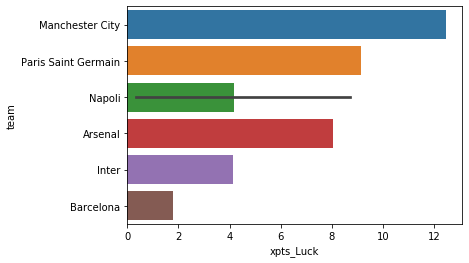

In [29]:
"""
Sort teams by their level of "luck"

Napoli have appeared 3 times in 5 years

Man City were incredibly "Unlucky" with a 12 point gap in expected total points between
them and 1st place Liverpool 
"""
sns.barplot(y= unlucky_teams['team'], x= unlucky_teams['xpts_Luck'])

### High Level Results:


* **We have found 8 examples of teams that have been found to be "Lucky" in their victory over rivals across this 5 year period. Of the unlucky teams finishing in 2nd place - Napoli take 3 of these spots**
* Arsenal in 2015 - Finishing 2nd place to Leicester City. They had a higher "Expected Points" tally at the end of the season by over 8 points. They also under-performed with their total goals tally and goals against (Unlucky across all 3 metrics).
* Most of the other unlucky sides had a very tight title race with just a few expected points making up the difference.
* Looking at Man City in 2019, their xG and xGA were hit by actuals but they got almost 6 points less than expected. So while they were unlucky over the course of the season, Liverpool (1st place) were very lucky to then pull away with such a big gap in expected points.

# Results

### How reliable are xG, xGA and xpts as a performance metric? 

In [37]:
"""
To examine this, we look at the correlation between these metrics for this 
5 year period for the top 5 leagues 

We expect to see a strong position correlation between points vs. exp points,
goals scored vs. xG and goals conceded vs. xGA 

We will also look into the relationship between other metrics 
"""

'\nTo examine this, we look at the correlation between these metrics for this \n5 year period for the top 5 leagues \n\nWe expect to see a strong position correlation between points vs. exp points,\ngoals scored vs. xG and goals conceded vs. xGA \n\nWe will also look into the relationship between other metrics \n'

### Scatter Plot of Points vs. Expected Points metrics:

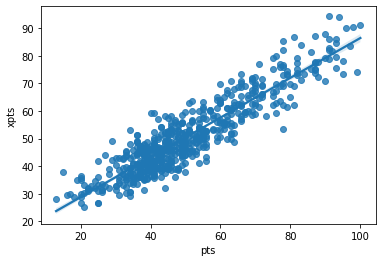

In [38]:
# use the function regplot to make a scatterplot
sns.regplot(x=team_stats["pts"], y=team_stats["xpts"])

### Scatter Plot of Goals vs. Expected Goals metrics:

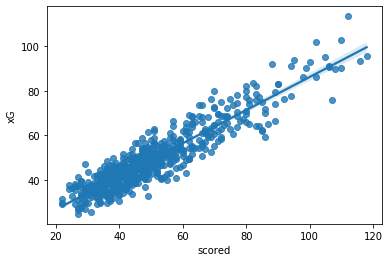

In [39]:
sns.regplot(x=team_stats["scored"], y=team_stats["xG"])

### Scatter Plot of Goals Against vs. Expected Goals Against metrics:

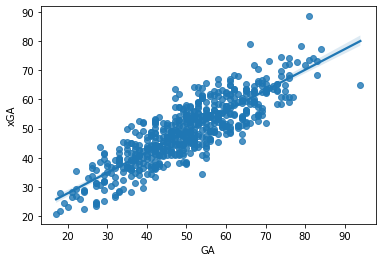

In [40]:
sns.regplot(x=team_stats["GA"], y=team_stats["xGA"])

All relationship here have a strong positive correlation for the dataset's top 5 leagues - Showing that the expected metrics do a good job in describing team performance with enough data

### Explore the relationship different metrics have with points & expected points tally

In [42]:
df = team_stats[['pts', 'scored', 'xG', 'xpts']]

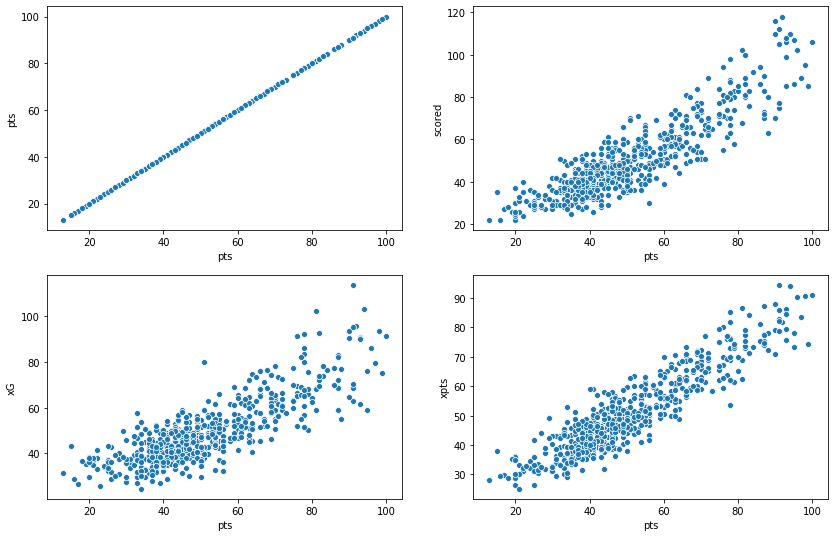

In [44]:
# Create a function to look at each metric and their relationship with total points each season 

# Plot out all of the datapoints for the top 5 leagues:
count = 1
plt.subplots(figsize = (14, 14))

for i in df.columns:
    plt.subplot(3, 2, count)
    sns.scatterplot(df["pts"], df[i])
    count += 1

plt.show()

* Starting with expected points, we can see a very strong positive correlation with the total points data recorded - Giving credibility to the new metric. More often than not good performances and matched with the deserved response, with just several outliers massively out-performing their expected points.
* The same can be said for both xG and goals scored data, a strong positive correlation with total points makes sense as the best teams usually score the most goals

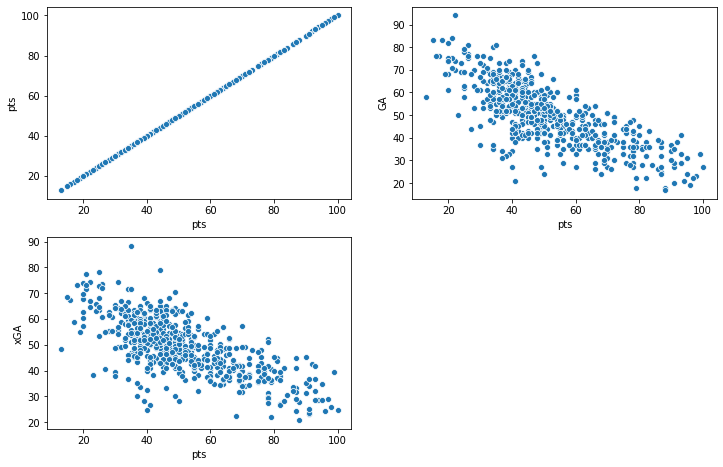

In [45]:
# Do the same again for the - GA & xGA Metrics:
df = team_stats[['pts', 'GA', 'xGA']]

count = 1
plt.subplots(figsize = (12, 12))

for i in df.columns:
    plt.subplot(3, 2, count)
    sns.scatterplot(df["pts"], df[i])
    count += 1

plt.show()

* Strong negative correlation can be seen between GA & xGA when measured against each teams points total by season as expected.

We can see how the different performance metrics match up, but we'll need a more detailed view to check which metrics influence points / exp points the most. In other words, how can we quantify the correlation each metric has with total points and expected points. 

### What is more correlated to total points - Goals Scored or Goals Conceded?

* We can see from the charts below there are strong positive and negative correlations between the xG and xGA metrics with total points
* Can we quantify this relationship?
* Which metric has a stronger correlation with success? Scoring more goals or conceding less?

In [46]:
# List of metrics we're interested in:
metric_correlations = team_stats[['league','scored', 'xG', 'GA', 'xGA', 'pts', 'xpts']]

metric_correlations = metric_correlations.set_index('league')

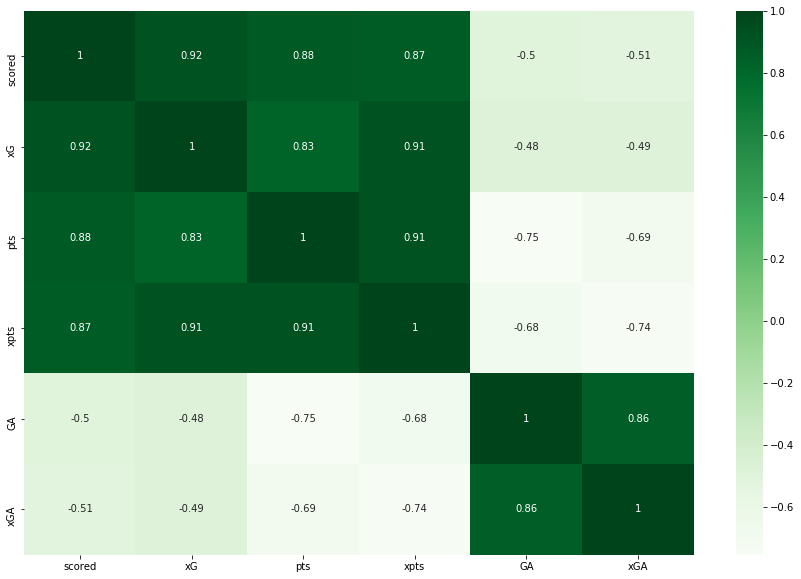

In [47]:
# Corelation between points & goals scored vs. goals conceded

# CHANGE CODE FOR CORRELATION BETWEEN DIFFERENT METRICS:
metric_correlations = team_stats[['league','scored', 'xG', 'pts', 'xpts', 'GA', 'xGA']]
metric_correlations = metric_correlations.set_index('league')

# Create correlations map for all of the metrics above:
corrmat = metric_correlations.corr()
plt.figure(figsize=(15,10))
graph = sns.heatmap(corrmat, annot=True, cmap = 'Greens', xticklabels='auto', yticklabels='auto')  #cmap="YlGnBu"

* From the correlation matrix we can see that xG and goals scored have a stronger correlation to points totals than the GA and xGA metrics
* This highlights the slight edge given to strong teams who play more "Attacking" football than those who tend to be more defensive - An interesting insight



### Serial Winners - Results vs. Underlying Performances

#### Juventus & Bayern Munich Case Study 

In [35]:
"""
We could see above that Napoli and Inter came close to winning the Serie A on 4 separate ocations 

Interestingly here - Juventus have won all 6 records of Serie A from 2014 - 2019
"""

team_stats[['league', 'year', 'team', 'Measure_Pts_Luck', 'Measure_Goals_Luck', 'Measure_GA_Luck']].loc[(team_stats['position'] == 1) & (team_stats['team'] == 'Juventus')]

,league,year,team,Measure_Pts_Luck,Measure_Goals_Luck,Measure_GA_Luck
348,Serie_A,2014,Juventus,Extremely Lucky,Extremely Lucky,Slightly Lucky
368,Serie_A,2015,Juventus,Extremely Lucky,Extremely Lucky,Slightly Lucky
388,Serie_A,2016,Juventus,Slightly Lucky,Slightly Lucky,Under-Performing
408,Serie_A,2017,Juventus,Extremely Lucky,Extremely Lucky,Slightly Lucky
428,Serie_A,2018,Juventus,Extremely Lucky,Slightly Lucky,Slightly Lucky
448,Serie_A,2019,Juventus,Extremely Lucky,Slightly Lucky,Under-Performing


* Trend here of Juventus getting "Lucky" and outperforming all underlying stats on a consistent basis year on year

In [36]:
"""
The only other team with the same level of dominance in winning all their domestic league titles here
are Bayern Munich 

Compare their end results vs. performance metrics over the season 
"""

team_stats[['league', 'year', 'team', 'Measure_Pts_Luck', 'Measure_Goals_Luck', 'Measure_GA_Luck']].loc[(team_stats['position'] == 1) & (team_stats['team'] == 'Bayern Munich')]


,league,year,team,Measure_Pts_Luck,Measure_Goals_Luck,Measure_GA_Luck
240,Bundesliga,2014,Bayern Munich,Slightly Lucky,Extremely Lucky,Slightly Lucky
258,Bundesliga,2015,Bayern Munich,Extremely Lucky,Slightly Lucky,Slightly Lucky
276,Bundesliga,2016,Bayern Munich,Slightly Lucky,Extremely Lucky,Slightly Lucky
294,Bundesliga,2017,Bayern Munich,Extremely Lucky,Extremely Lucky,Slightly Lucky
312,Bundesliga,2018,Bayern Munich,Under-Performing,Under-Performing,Under-Performing
330,Bundesliga,2019,Bayern Munich,Slightly Lucky,Slightly Lucky,Slightly Lucky


* Bayern Munich, another serial winner seem to out-perform their underlying stats the majority of the time here too. This seems to be a common theme for the most dominant teams. 

# Insights 

* Looking at the 5 year period for all 5 leagues - 8 winners out of a possible 30, won the league being the 2nd best team that year according to their underlying stats. This is what makes soccer so unpredictable for sports betting.

* We can see a very strong positive correlation between the xG and goals score - Showing the reliability of these metrics. Gives us a different way to view soccer data, not just relying on the actual datapoints but the performances too. Results do not always correlate with performance.

* Everyone is familiar with the fairytale story of how Leicester City won the Premier League back in 2016. From this data, we can now see that they won with a significant margin of "Luck". 

* Juventus are a very interesting case study throughout this analysis. They managed to win all 6 Serie A titles in this 6 year period, while being the 2nd best team on paper for 4 of those years. From this analysis we can see that to win consecutive league titles (Like Bayern Munich), you must consistently out-perform your underlying statistics. 

* From looking through the correlation matrix - What jumps out is the strength of the strong positive corr between goals scored and xG with points tallys. Teams that score more goals tend to accumulate more points than compared with good teams with a strong defense but less attacking output.


* Napoli appeared 3 times more than any other team when examining the "Unlucky" runners up who had a higher expected points tally than the winner that year. This changes my perception of the Serie A as a boring league - With the underlying numbers showing from a performance perspective it's very competitive. 

# References 

* **Data:** https://www.kaggle.com/slehkyi/web-scraping-football-statistics-2014-now/data

* **Metrics & Definitions:**
    * https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg
    * https://www.understat.com